# Basic Python
* Booleans and Control Flow
* Functions
* Exceptions
* Plotting

We'll be embedding some HTML into our notebook.  To do so, we need to import a library:

In [1]:
from IPython.display import HTML

We'll also probably use `numpy` so we might as well import it too:

In [2]:
import numpy as np

## Booleans and Control Flow
These are pretty standard things in any language.  I'll just show you a little bit of syntax here.

However, I will put a slight emphasis on the exception testing.  It's important.

#### Testing for membership

In [3]:
some_primes = [2, 3, 5, 7, 13]
print(4 in some_primes)
print(13 in some_primes)

False
True


#### Some basic if/elif/else statements

In [4]:
x = 9
if x in some_primes:
    print('x is prime!')
elif x > 13:
    print('x may or may not be prime.')
else:
    print('x is definitely not prime.')

x is definitely not prime.


Breaking out of a loop:

In [5]:
for x in some_primes:
    if x == 2:
        print('Only even prime.')
        break
        

Only even prime.


Continuing a loop.  Notice that everything after the continue statement is ignored.

In [6]:
i = 0
while i < 10:
    i += 1
    if i <= 5:
        print(i)
        continue
        print(i-1)
    else:
        print('Done with this.')
        break
    

1
2
3
4
5
Done with this.


#### Some basic exception handling
Python has a number of built-in exceptions ([Built-in exceptions](https://docs.python.org/3/library/exceptions.html), [Python Standard Exceptions](https://www.tutorialspoint.com/python/standard_exceptions.htm)).  It is usually a good idea to let Python raise exceptions for you since it's really good at it.  However, there are times when you may want to write your own exception (we won't talk about that now) or when you want to press ahead even in the face of an error.

I can make that last statement clearer.  You have two options:  catch and respond to errors when they're raised or ignore them.  If you ignore them, then Python's default exception-handling behavior takes over which will ultimately print out the error message and terminate the program.  If you respond to the errors, then you need to tell your program what to do.  In essence, you will shift the control flow of your program if you choose this second option.

Let's look at an example or two.

In [7]:
x, y = 1.0, 0.0
z = x / y
z**2.0

ZeroDivisionError: float division by zero

Python took care of error for us and terminated the program at the second line.

But perhaps a division by zero isn't the end of the world.  What if we have a piece-wise function?

In [8]:
x, y = 1.0, 0.0
try:
    z = x / y
except ZeroDivisionError:
    z = 0.0
print('z = {}'.format(z))

z = 0.0


This could, of course, have been handled with an `if-else` block.

One old motivation for using exception handling is to check the input arguments of a function for validity.  You can still do this, but the latest advice is to just let Python's exception handler deal with it and terminate the program if need be.

## Functions
#### Python functions are first class:
* You can assign variables to them
* You can pass them into functions
* You can return them from functions



### Example: 

In [9]:
alist = [1,13,5,7]
newmax = max # Assign newmax to the function max
mymax1 = max(alist) # Get the maximum of the list using the max built-in
mymax2 = newmax(alist) # Get the maximum of the list using the new max function
print('Original maximum gives {0} and new maximum gives {1}.'.format(mymax1, mymax2))

Original maximum gives 13 and new maximum gives 13.


The syntax for defining functions is pretty straightforward.

In [10]:
def rect(w,h):
    return w * h
def circle(r):
    return np.pi * r * r
def parabola(x, a, b, c):
    return a * x * x + b * x + c

Notice that the function name is preceeded by the keyword `def`.  The end of the line **must** have a colon!  The function body is indented.  The quantity to be returned is returned using the `return` statement.

Because functions are first class, we can pass functions to other functions.

In [11]:
def parab_extrema(a, b, c, parab):
    x_extreme = - b / 2.0 / a # Location of max or min
    x_left = x_extreme - 1.0  # Point to the left of max or min
    x_right = x_extreme + 1.0 # Point to the right of max or min
    p_left = parab(x_left, a, b, c) # Value at left point
    p_right = parab(x_right, a, b, c) # Value at right point
    p_extreme = parab(x_extreme, a, b, c) # Value at max or min
    # Check if extremum is maximum or minimum and print out result
    if (p_left > p_extreme) & (p_right > p_extreme):
        print('The extremum for this parabola has coordinates ({x:4.3f}, {y:4.3f}) and is a minimum.'.format(x=x_extreme, y=p_extreme))
    elif (p_left < p_extreme) & (p_right < p_extreme):
        print('The extremum for this parabola has coordinates ({x:4.3f}, {y:4.3f}) and is a maximum.'.format(x=x_extreme, y=p_extreme))
    else:
        print('Something went wrong.')

In [12]:
a, b, c = 0.2, 1.0, -3.0
parab_extrema(a, b, c, parabola)
a, b, c = -5.0, -5.0, 5.0
parab_extrema(a, b, c, parabola)

The extremum for this parabola has coordinates (-2.500, -4.250) and is a minimum.
The extremum for this parabola has coordinates (-0.500, 6.250) and is a maximum.


There are some other convenient ways to interact with function arguments.

One thing you may wish to do is provide a default argument to the function.  If that argument is not specified when the function is called, then the default value is assumed.  This is a type of keyword argument.

Let's return to our nice parabola example.  We'll make $b=0$ the default.

In [13]:
def parabola(x, a, c, b=0.0):
    return a * x * x + b * x + c

Notice that we had to move our default argument to a position _after_ the mandatory arguments.  That hurts the readability a little bit in this example, but we'll press forward regardless.

Now call the `parab_extreme() function` again.

In [14]:
def parab_extrema(a, b, c, parab):
    x_extreme = - b / 2.0 / a # Location of max or min
    x_left = x_extreme - 1.0  # Point to the left of max or min
    x_right = x_extreme + 1.0 # Point to the right of max or min
    p_left = parab(x_left, a, c) # Value at left point
    p_right = parab(x_right, a, c) # Value at right point
    p_extreme = parab(x_extreme, a, c) # Value at max or min
    # Check if extremum is maximum or minimum and print out result
    if (p_left > p_extreme) & (p_right > p_extreme):
        print('The extremum for this parabola has coordinates ({x:4.3f}, {y:4.3f}) and is a minimum.'.format(x=x_extreme, y=p_extreme))
    elif (p_left < p_extreme) & (p_right < p_extreme):
        print('The extremum for this parabola has coordinates ({x:4.3f}, {y:4.3f}) and is a maximum.'.format(x=x_extreme, y=p_extreme))
    else:
        print('Something went wrong.')

We changed the [API](https://en.wikipedia.org/wiki/Application_programming_interface) a little bit and so we had to update the calls to `parab()`.  However, everything works just fine if we're careful.

It's probably better to give all the parameter arguments default values.  Let's re-write the API again.

In [15]:
def parabola(x, a=1.0, b=-1.0, c=-1.0):
    return a * x * x + b * x + c

def parab_extrema(parab, a=1.0, b=-1.0, c=-1.0):
    x_extreme = - b / 2.0 / a # Location of max or min
    x_left = x_extreme - 1.0  # Point to the left of max or min
    x_right = x_extreme + 1.0 # Point to the right of max or min
    p_left = parab(x_left, a, b, c) # Value at left point
    p_right = parab(x_right, a, b, c) # Value at right point
    p_extreme = parab(x_extreme, a, b, c) # Value at max or min
    # Check if extremum is maximum or minimum and print out result
    if (p_left > p_extreme) & (p_right > p_extreme):
        print('The extremum for this parabola has coordinates ({x:4.3f}, {y:4.3f}) and is a minimum.'.format(x=x_extreme, y=p_extreme))
    elif (p_left < p_extreme) & (p_right < p_extreme):
        print('The extremum for this parabola has coordinates ({x:4.3f}, {y:4.3f}) and is a maximum.'.format(x=x_extreme, y=p_extreme))
    else:
        print('Something went wrong.')

parab_extrema(parabola)

The extremum for this parabola has coordinates (0.500, -1.250) and is a minimum.


Great!  Looks pretty nice.

But there's more!  We can also provide _positional_ and _keyword_ arguments to a function.  This allows permits a variable number of arguments to be passed to a function.

* positional arguments:  ```def: func(*args)```
  + Python collects all the remaining positional arguments into a tuple.  You can then access the tuple with the usual indexing.
* keyword arguments:  ```def: func(**kwargs)```
  + Python collects all the remaining keyword arguments into a dictionary.  You can then access the dictionary with the usual indexing.

### Variable Positional Arguments
We will once again work with the quadratic equation example.  This time, we'll just work with the `parabola` function to save some space.  Let's change the `parabola` function to permit a variable number of arguments.

In [16]:
def parabola(x, *args):
    return args[0] * x * x + args[1] * x + args[2]
parabola(1.0, 1.0, -1.0, -1.0)

-1.0

Seems to work okay.  But this is not a very robust code.  Everything breaks if we don't provide the exact number of necessary arguments.

In [17]:
parabola(1.0)

IndexError: tuple index out of range

### Variable keyword arguments
We can make our API more flexible.  Let's give more descriptive names to the coefficients $a$, $b$, and $c$.  We'll call $a$ the `width` since it controls the width of the parabola, $b$ `trans` since it controls the horizontal translation of the parabola, and we'll call $c$ `shift` since it controls the verticle shift of the parabola.  Our `parabola` function might now look like:

In [18]:
def parabola(x, **kwargs):
    print(kwargs)
    return kwargs['width'] * x * x + kwargs['trans'] * x + kwargs['shift']

Calling it gives:

In [19]:
parabola(1.0, width=1.0, trans=-1.0, shift=-1.0)

{'width': 1.0, 'trans': -1.0, 'shift': -1.0}


-1.0

**Note:** Using variable positional and keyword arguments provides exceptional flexibility in how you design your programs.

One final note about variable arguments:  You can perform the reverse operation by passing in the `*` or `**` operators to the function.  This will _unpack_ the arguments whereas the previous pattern _packed_ the arguments.  Let's take a quick look.

In [20]:
def parabola(x, a, b, c):
    return a * x * x + b * x + c

In [21]:
# Store coefficients in a list
coeffs = [1.0, -1.0, -1.0]
parabola(1.0, *coeffs)

# Store coefficients in a dictionary
coeffs = {'a':1.0, 'b':-1.0, 'c':-1.0}
parabola(1.0, **coeffs)

-1.0

---
## Plotting
There are many, many ways to make plots in Python.  The most common way is to use [`matplotlib`](https://matplotlib.org/).

Another package, which is gaining popularity, is called [`seaborn`](https://seaborn.pydata.org/).

I don't care which package you use, as long as your plots are readable and reproducible.

To make plots in the Jupyter notbook, you need to include the line `%matplotlib inline` before you make any plots.  This line ensures that the plots will be displayed in your notebook and not in a separate window.

In [22]:
%matplotlib inline

Next, you should import matplotlib:

In [23]:
import matplotlib               # Import all of matplotlib
import matplotlib.pyplot as plt # Only import pyplot (which includes the plot function) and give it the alias `plt`

Now you're basically ready to do some plots.

**WARNING!** When making plots in an actual Python script, you must **always** include the command `plt.show()` at the **end** of your program.  **Always.** If you don't do so, then your plots will not display and you will be wondering where they are.  However, when plotting in the Jupyter notebook, there is no need to use `plt.show()`.

We can generate some toy data using `numpy`.

In [24]:
x = np.linspace(-2.0*np.pi, 2.0*np.pi, 500) # x-grid
ys = np.sin(x) # sin function
yc = np.cos(x) # cos function

Now plot!

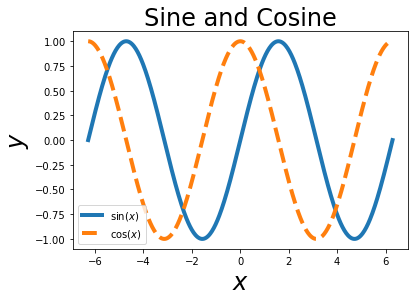

In [25]:
plt.plot(x, ys, lw=4, ls='-', label=r'$\sin(x)$')  # linewidth = 4, linestyle = solid, raw string label
plt.plot(x, yc, lw=4, ls='--', label=r'$\cos(x)$')
plt.legend() # show legend
plt.xlabel(r'$x$', fontsize=24) # label x axis
plt.ylabel(r'$y$', fontsize=24) # label y axis
plt.title('Sine and Cosine', fontsize=24)

Notice that we used a few things:
1. We changed the line widths
2. We changed the line style
3. We labeled the plots
4. We changed the font size of the labels

We also use a `raw string` because we're including Latex commands to render mathematics.  A `raw string` is preceeded by the letter `r`.

There is **much** more to plotting than this example, but this should get you started.  Some things you may want to look up are how to change the size of the tick marks and tick labels and how to use a `config` file: [Customizing a Plot](https://matplotlib.org/users/customizing.html).  You may also want to understand _contour_ plots as well as _scatter_ plots and other statistical plots such as `pdfs` and `histograms`.  Note that `seaborn` has fantastic support for statistical plots.